## EDA

Analisis exploratorio de los datos.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import create_engine

* Cargamos los dataset.

In [49]:
homicidios = pd.read_excel("../Datasets/homicidios_HECHOS.xlsx")
victimas = pd.read_excel("../Datasets/homicidios_VICTIMAS.xlsx")

* Visualizamos los dalos por comunas

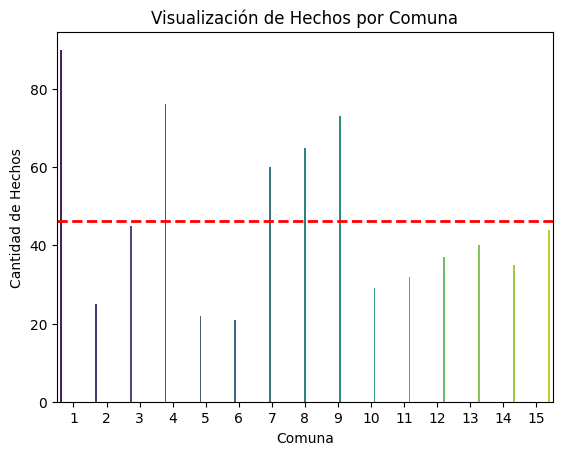

In [47]:
# Suponiendo que 'COMUNA' es la columna que deseas visualizar
ax = sns.countplot(x='COMUNA', data=homicidios, palette="viridis", hue='COMUNA')

# Añadir línea con la media
mean_line = homicidios['COMUNA'].value_counts().mean()
plt.axhline(mean_line, color='red', linestyle='dashed', linewidth=2, label='Media')

plt.title('Visualización de Hechos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Hechos')

# Eliminar la leyenda de Seaborn y ajustar la posición de la leyenda de Matplotlib
ax.legend_.set_visible(False)

plt.show()

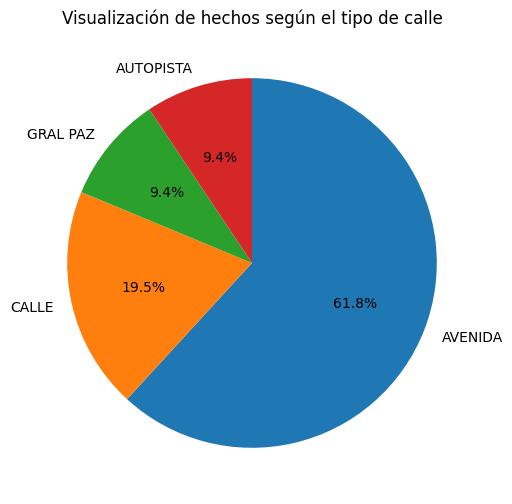

In [48]:
import matplotlib.pyplot as plt

# Obtener la serie con la cuenta de hechos por tipo de calle
conteo_por_tipo_calle = homicidios['TIPO_DE_CALLE'].value_counts()

# Crear un gráfico de torta con porcentajes
plt.figure(figsize=(6, 6))
plt.pie(conteo_por_tipo_calle, labels=conteo_por_tipo_calle.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# Añadir título
plt.title('Visualización de hechos según el tipo de calle')

# Mostrar el gráfico
plt.show()

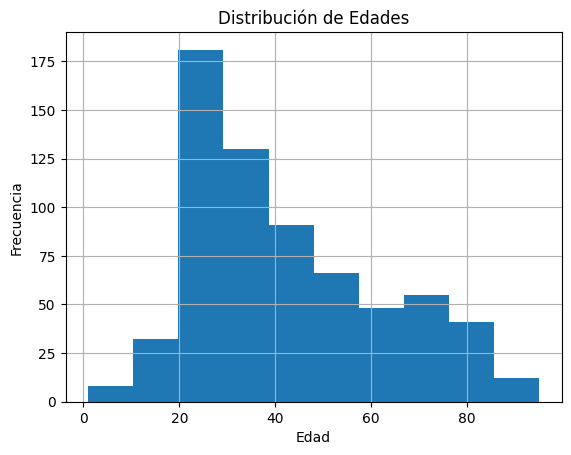

In [50]:
# Convertir la columna 'EDAD' a tipo numérico
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')

# Crear el histograma después de la conversión
victimas['EDAD'].hist()
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()